<a href="https://colab.research.google.com/github/rajputankur56/EDA_Project_onlineRetail/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will give Exploratory Data Analysis of [online Retail Data](https://archive.ics.uci.edu/ml/datasets/online+retail) from [UCI](https://archive.ics.uci.edu/ml/datasets/) 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_excel('/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


.info() tells us that it has 541909 entries and 8 columns.
InvoiceNo, StockCode, Description,Country all of them has string datatype.
UnitPrice, CustomerID can be numeric(Float) and Quantity is numeric(int). We hav emissing values for Description,CustomerID we need to treat this.


In [20]:
df['CustomerID'] = df['CustomerID'].astype('object')

In [32]:
df_null_desc = df.loc[df.Description.isnull()]
df_null_desc['UnitPrice'].sum()
df.dropna(subset=['Description'],inplace=True)

After dropping all rows for Description as na cause cause unit price of product is 0.

In [47]:
df_null_custID = df.loc[df.CustomerID.isnull()]
df_null_custID['UnitPrice'].sum()
df_null_custID.shape
# df_null_custID.CustomerID.unique()
df['CustomerID'] = df['CustomerID'].fillna('UNKNOWN')

We have too many missingValues for CustomerID, lets suppose nan  is itself a customer id and change it to UNKNOWN to see other insight on this.

In [48]:
## check for duplicates
df_duplicate = df.loc[df.duplicated() == True]
df_duplicate.shape
# drop duplicated and keep only one occurence
df.drop_duplicates(keep = 'first',inplace=True)

In [57]:
df.describe()

,Quantity,UnitPrice
count,535187.000000,535187.000000
mean,9.671593,4.645242
std,219.059056,97.364810
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [77]:
## removing Invalid values for Quantity and UnitPrice
Invalid_df = df.loc[(df.Quantity < 1) | (df.UnitPrice < 0)]
df.drop(Invalid_df.index,inplace=True)

I found Few records with UnitPrice = 0.0 but didn't deleted them cause maybe they were discounted items. It is a question to be asked while doing analysis.

In [78]:
df.describe()

,Quantity,UnitPrice
count,525460.00000,525460.000000
mean,10.68106,3.918228
std,157.39957,36.073270
min,1.00000,0.000000
25%,1.00000,1.250000
50%,4.00000,2.080000
75%,11.00000,4.130000
max,80995.00000,13541.330000


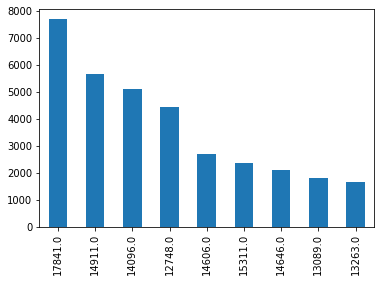

In [93]:
## check for a customer who bought most from retails store excluding UNKNOWN
top10_buyer=df.CustomerID.value_counts()[1:10]
top10_buyer.plot(kind='bar')

In [111]:
## check rows of top buyers and get other statistics
# top_buyer=df.CustomerID.value_counts()[1:]
df['TotalBill'] = df.Quantity * df.UnitPrice
buyer_group = df.groupby(['CustomerID']).agg({
    'TotalBill':sum,
})
buyer_group

,TotalBill
CustomerID,
12346.0,7.718360e+04
12347.0,4.310000e+03
12348.0,1.797240e+03
12349.0,1.757550e+03
12350.0,3.344000e+02
...,...
18281.0,8.082000e+01
18282.0,1.780500e+02
18283.0,2.045530e+03


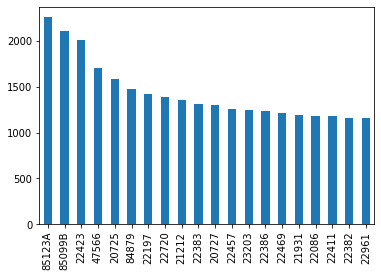

In [115]:
## Check product frequency and trend
top_product=df.StockCode.value_counts()[:20]
top_product.plot(kind='bar')

In [117]:
product_group = df.groupby(['StockCode']).agg({
    'Quantity':sum,
})
product_group

,Quantity
StockCode,
10002,860
10080,325
10120,192
10125,1295
10133,2856
...,...
gift_0001_20,20
gift_0001_30,7
gift_0001_40,3
